# Customer Churn Analysis

In [2]:
#importing all the required libraries for EDA and vizualiztion.
import pandas as pd    # library for EDA.
import numpy as np     # library for numerical calculations.
import seaborn as sns  # library for vizualization.
import matplotlib.pyplot as plt  # library for vizualization.
import math
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings

In [3]:
#lets load dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
#lets check the type of dataset
type(df)
#since our dataset is already dataframe, no need to again make dataframe

pandas.core.frame.DataFrame

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis(EDA)

In [6]:
#print columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#checking rows and columns
df.shape

(7043, 21)

In [8]:
#checking datatype of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#  check null values and summing up columns wise
print('Total null values= ',df.isnull().sum().sum())
df.isnull().sum()

Total null values=  0


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* In the above outcome TotalCharges is object type but it is supposed to be numeric so we will convert it into numeric and see if there are null values present.

In [11]:
df1=df.copy()
df1.TotalCharges=pd.to_numeric(df1.TotalCharges, errors='coerce')

In [12]:
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Now we can see that there are 11 null values present in the TotalCharges column

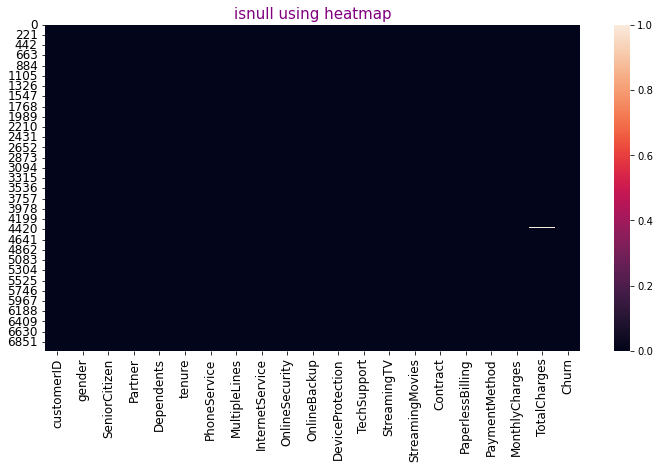

In [13]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df1.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* You can see in the above heatmap that there is a white line present in the TotalCharges column repersenting null values

### Observations:

from the above outcomes

* Dataset has 7043 rows and 21 columns.
* All the columns have no null values Except TotalCharges which shows 11 nulls after converting it to numeric type from object type
* In the heat map there are lines which  shows null values in the columns.
* Dataset contains float64, int64 and object datatypes.

# Data Cleaning

* Since the null value percentage is very low, we can ignore them by dropping null values

In [14]:
df1.dropna(inplace=True)

In [15]:
df1.isnull().sum().sum()

0

In [16]:
df.shape

(7043, 21)

In [17]:
df1.shape

(7032, 21)

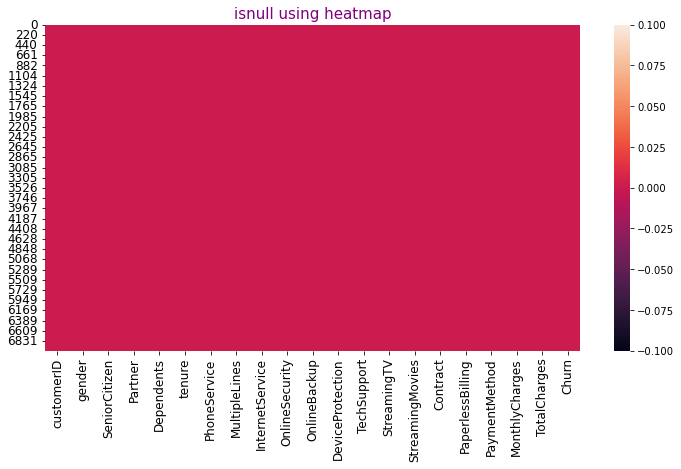

In [18]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df1.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations:

from the above outcomes

* Dataset has 7032 row and 21 columns. Before there were 7043 columns.After dropping null values we have got the final shape.
* All the null values have cleaned up and the columns have no null values.
* In the heat map there are no  lines which  shows null values in the columns. Heatmap is clean and plane.

In [19]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Vizualization

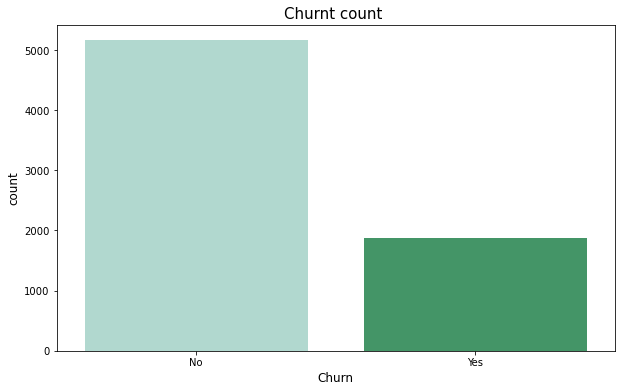

No     73.42
Yes    26.58
Name: Churn, dtype: float64


No     5163
Yes    1869
Name: Churn, dtype: int64

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(df1['Churn'], palette='BuGn')
plt.title('Churnt count ', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

print(round(100*(df1['Churn'].value_counts()/len(df1['Churn'])),2))

df1['Churn'].value_counts()

### Observations

* In our dataset we have more records of non-churned customers i.e 73.42 % data than churned customers(26.48%)
* 5163 rows belongs to customers who didnot churned and 1869 rows belongs top customers who churned.
* Therefore the the dataset is highly imbalanced.

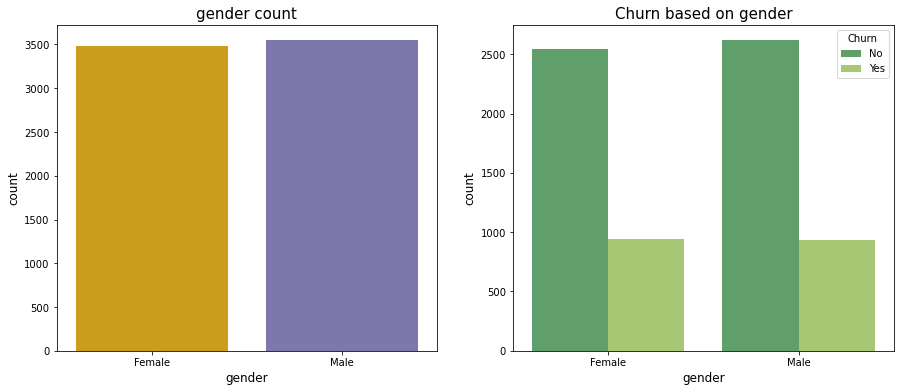

Male      3549
Female    3483
Name: gender, dtype: int64


Male      50.47
Female    49.53
Name: gender, dtype: float64

In [21]:

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['gender'], palette='Dark2_r')
plt.title('gender count', fontsize=15)
plt.xlabel('gender', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['gender'], hue= df1['Churn'],palette='summer')
plt.title('Churn based on gender', fontsize=15)
plt.xlabel('gender', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['gender'].value_counts())

round(100*(df1['gender'].value_counts()/len(df1['gender'])),2)

### Observations

* gender column has almost  equal amount of Female and Male percentage i.e 50.47% of Males and 49.53% Females.
* There is not much difference in Male and Female churn ratio.It is almost equal.

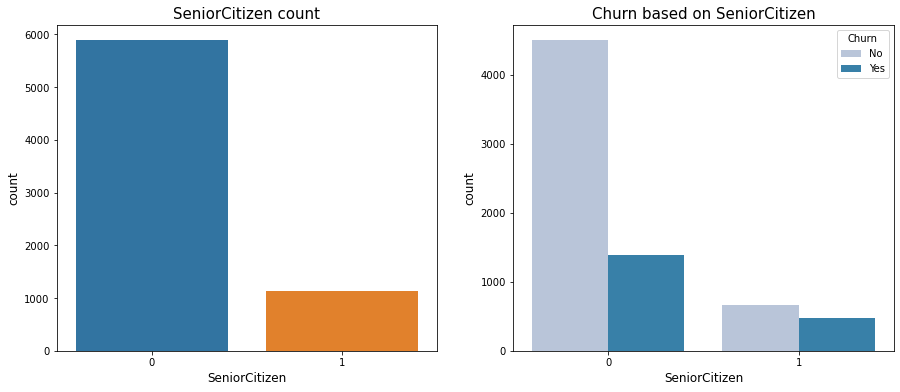

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


0    83.76
1    16.24
Name: SeniorCitizen, dtype: float64

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['SeniorCitizen'], palette='tab10')
plt.title('SeniorCitizen count', fontsize=15)
plt.xlabel('SeniorCitizen', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['SeniorCitizen'], hue= df1['Churn'],palette='PuBu')
plt.title('Churn based on SeniorCitizen', fontsize=15)
plt.xlabel('SeniorCitizen', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['SeniorCitizen'].value_counts())

round(100*(df1['SeniorCitizen'].value_counts()/len(df1['SeniorCitizen'])),2)

### Observations

* Dataset has 5890(83.76%) records of customers who are not seniorcitizens and 1142(16.24%) records of customers who are Senoir citizens.
* The churn percentage among Senior Citizens is high compared to churn percentage among Non Senior Citizens.
* Almost 90 percent of customers among senior citizens has churned.

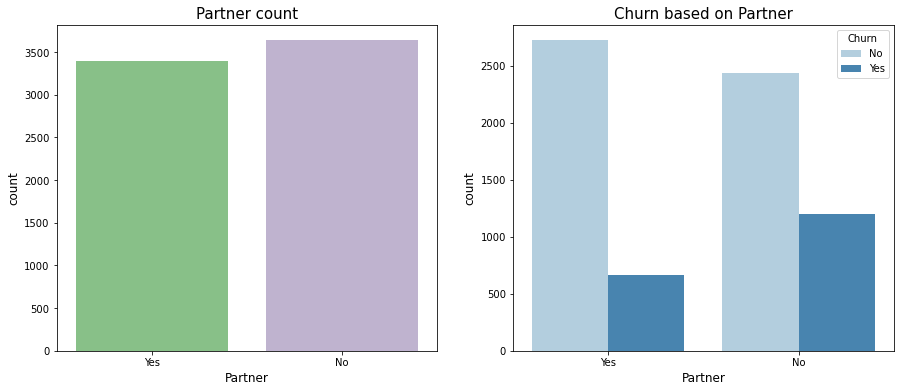

No     3639
Yes    3393
Name: Partner, dtype: int64


No     51.75
Yes    48.25
Name: Partner, dtype: float64

In [23]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['Partner'], palette='Accent')
plt.title('Partner count', fontsize=15)
plt.xlabel('Partner', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['Partner'], hue= df1['Churn'],palette='Blues')
plt.title('Churn based on Partner', fontsize=15)
plt.xlabel('Partner', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['Partner'].value_counts())

round(100*(df1['Partner'].value_counts()/len(df1['Partner'])),2)

### Observations

* In our Dataset 3393(48.25%) customers have partners and 3639(51.75%) customers doest not have partners.
* The percentage of churn is more in customers who doest not have partners compared to cutomers with no partners.

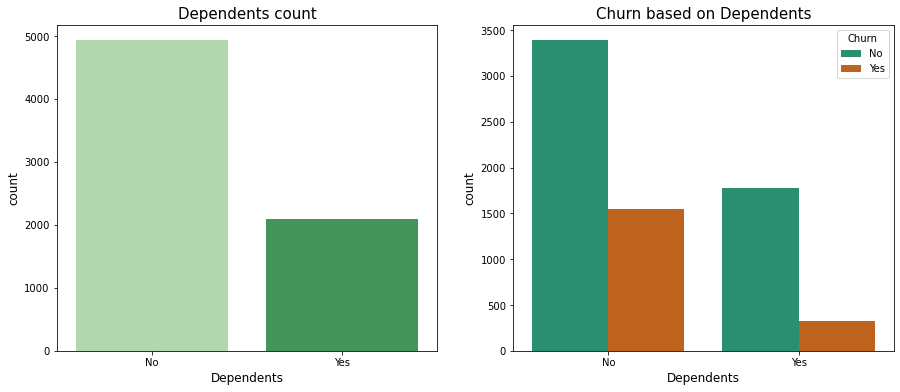

No     4933
Yes    2099
Name: Dependents, dtype: int64


No     70.15
Yes    29.85
Name: Dependents, dtype: float64

In [24]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['Dependents'], palette='Greens')
plt.title('Dependents count', fontsize=15)
plt.xlabel('Dependents', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['Dependents'], hue= df1['Churn'],palette='Dark2')
plt.title('Churn based on Dependents', fontsize=15)
plt.xlabel('Dependents', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['Dependents'].value_counts())

round(100*(df1['Dependents'].value_counts()/len(df1['Dependents'])),2)

### Observations

* The percentage of customers with dependants(29.85%) is less compared to the percentage of customers with no dependants(70.15%)
* The customers with no dependants has more churn percentage(around 30%) compared to customers with dependants(around 15%).

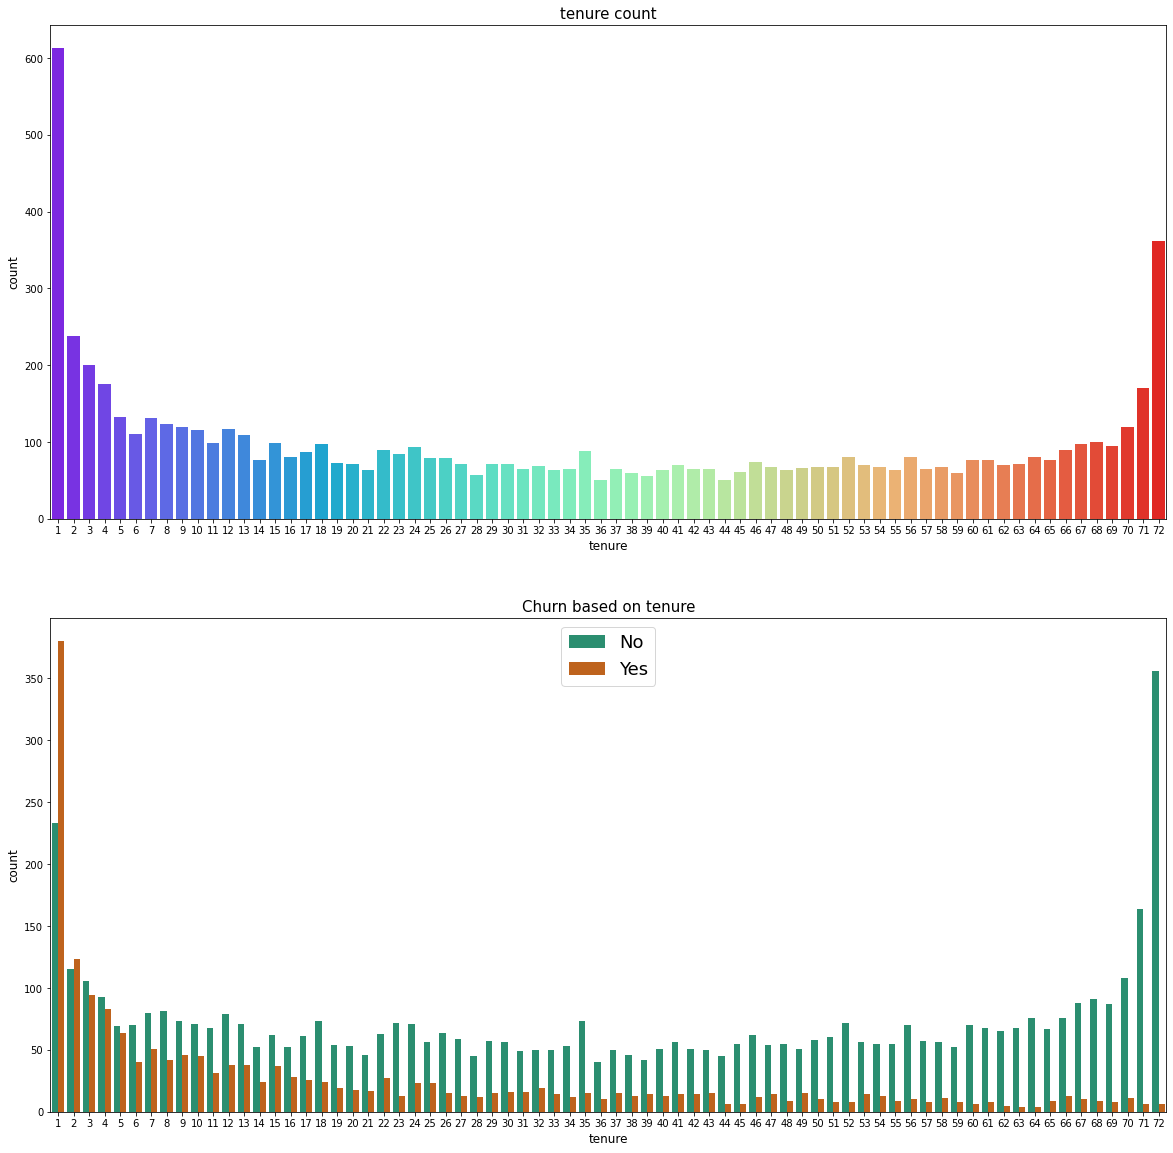

In [25]:
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
sns.countplot(df1['tenure'], palette='rainbow')
plt.title('tenure count', fontsize=15)
plt.xlabel('tenure', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(2,1,2)
sns.countplot(df1['tenure'], hue= df1['Churn'],palette='Dark2')
plt.title('Churn based on tenure', fontsize=15)
plt.xlabel('tenure', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(loc='upper center',fontsize=18)

plt.show()

### Observations

* The percentage of churn is high in customers with 1 to 5 months of Tenure.
* The long term user has maintaned loyalty.

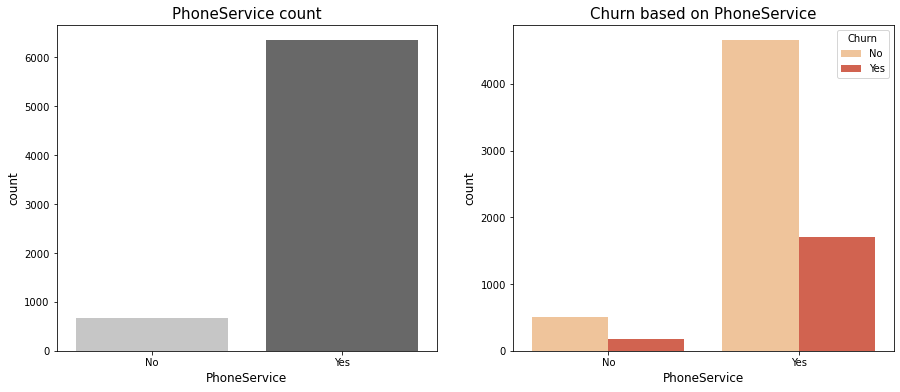

Yes    6352
No      680
Name: PhoneService, dtype: int64


Yes    90.33
No      9.67
Name: PhoneService, dtype: float64

In [26]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['PhoneService'], palette='Greys')
plt.title('PhoneService count', fontsize=15)
plt.xlabel('PhoneService', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['PhoneService'], hue= df1['Churn'],palette='OrRd')
plt.title('Churn based on PhoneService', fontsize=15)
plt.xlabel('PhoneService', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['PhoneService'].value_counts())

round(100*(df1['PhoneService'].value_counts()/len(df1['PhoneService'])),2)

### Observations

* According to our dataset 90% customers have taken Phoneservice only 10 % has not takedn Phoneservice.

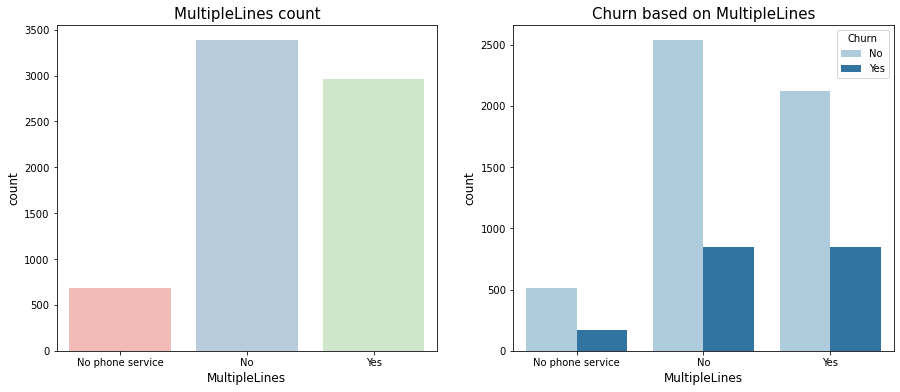

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


No                  48.14
Yes                 42.19
No phone service     9.67
Name: MultipleLines, dtype: float64

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['MultipleLines'], palette='Pastel1')
plt.title('MultipleLines count', fontsize=15)
plt.xlabel('MultipleLines', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['MultipleLines'], hue= df1['Churn'],palette='Paired')
plt.title('Churn based on MultipleLines', fontsize=15)
plt.xlabel('MultipleLines', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['MultipleLines'].value_counts())

round(100*(df1['MultipleLines'].value_counts()/len(df1['MultipleLines'])),2)

### Observations

* We have more records for no multiplelines(3385 rows)
* Among all the three categories customers with multiple lines have more churn percentage.

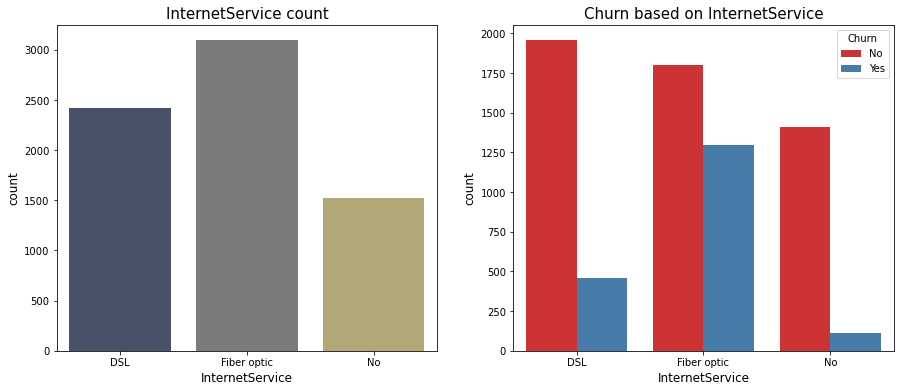

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


Fiber optic    44.03
DSL            34.36
No             21.62
Name: InternetService, dtype: float64

In [28]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['InternetService'], palette='cividis')
plt.title('InternetService count', fontsize=15)
plt.xlabel('InternetService', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['InternetService'], hue= df1['Churn'],palette='Set1')
plt.title('Churn based on InternetService', fontsize=15)
plt.xlabel('InternetService', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['InternetService'].value_counts())

round(100*(df1['InternetService'].value_counts()/len(df1['InternetService'])),2)

### Observations

* In the dataset we have more of customers with Fiber optic internet(3096 records) followed up by DSL type(2416 records) internet service and least records of customers with no internet service(1520 records)
* Among all three categories Fibre optic internet service customers has high churn percentage.
* Among 3096 FIbre optic customers around 1350 cutomers have churned. That is almost 50% of Fibre optic customers churned.

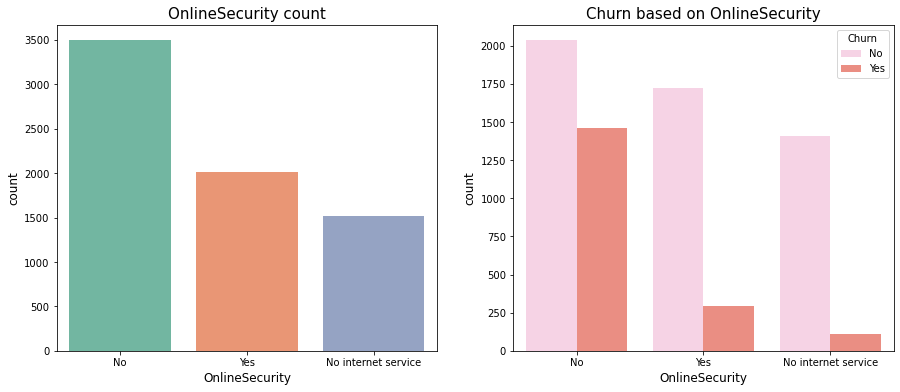

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


No                     49.73
Yes                    28.65
No internet service    21.62
Name: OnlineSecurity, dtype: float64

In [29]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['OnlineSecurity'], palette='Set2')
plt.title('OnlineSecurity count', fontsize=15)
plt.xlabel('OnlineSecurity', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['OnlineSecurity'], hue= df1['Churn'],palette='Set3_r')
plt.title('Churn based on OnlineSecurity', fontsize=15)
plt.xlabel('OnlineSecurity', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['OnlineSecurity'].value_counts())

round(100*(df1['OnlineSecurity'].value_counts()/len(df1['OnlineSecurity'])),2)

### Observations

* 49.73%(3497 records) customers have no Online security and 28.65%(2015 records) customers have Online security and 21.62% have not taken internet service.
* As we can see above customers with no Onlinesecurity has high churn percenatge among others.
* Almost 50% of customers have churned among customers with no online security.

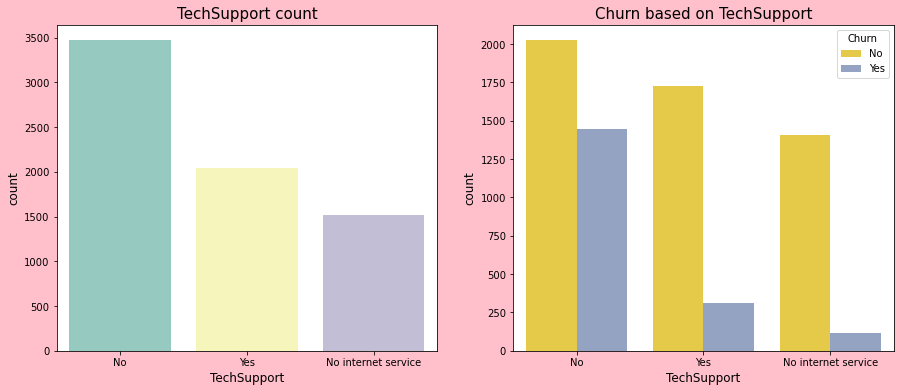

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


No                     49.37
Yes                    29.01
No internet service    21.62
Name: TechSupport, dtype: float64

In [193]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['TechSupport'], palette='Set3')
plt.title('TechSupport count', fontsize=15)
plt.xlabel('TechSupport', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['TechSupport'], hue= df1['Churn'],palette='Set2_r')
plt.title('Churn based on TechSupport', fontsize=15)
plt.xlabel('TechSupport', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['TechSupport'].value_counts())

round(100*(df1['TechSupport'].value_counts()/len(df1['TechSupport'])),2)

### Observations

* According toour dataset 49.37 percent are not getting tech support and 29.01 percent customers gettng tech support and 21.62 customers dont have internet service.
* Majority of customers are not getting Tech support.
* The churn percentage is more where customers are not getting Tech Support comapred to others.

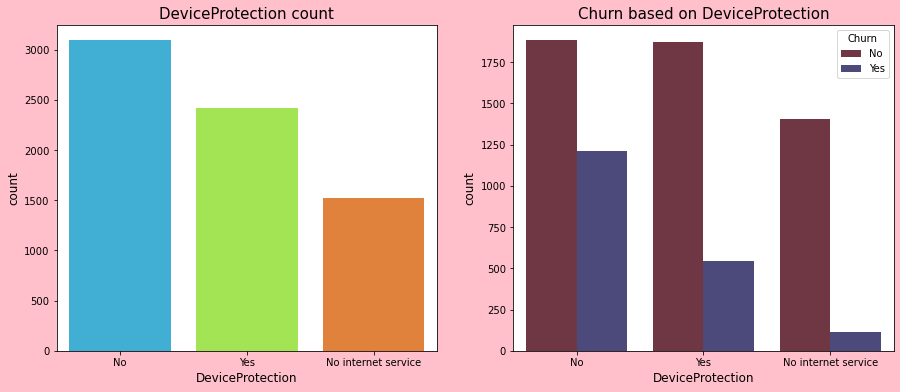

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


No                     44.00
Yes                    34.39
No internet service    21.62
Name: DeviceProtection, dtype: float64

In [197]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['DeviceProtection'], palette='turbo')
plt.title('DeviceProtection count', fontsize=15)
plt.xlabel('DeviceProtection', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['DeviceProtection'], hue= df1['Churn'],palette='icefire_r')
plt.title('Churn based on DeviceProtection', fontsize=15)
plt.xlabel('DeviceProtection', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['DeviceProtection'].value_counts())

round(100*(df1['DeviceProtection'].value_counts()/len(df1['DeviceProtection'])),2)

### Observations

* According to our dataset 44.00 percent are not getting Device Protection and 34.39 percent customers gettng DeviceProtection and 21.62 customers dont have internet service.
* Majority of customers are not getting Device Protection.
* The churn percentage is more where customers are not getting Device Protection comapred to others.

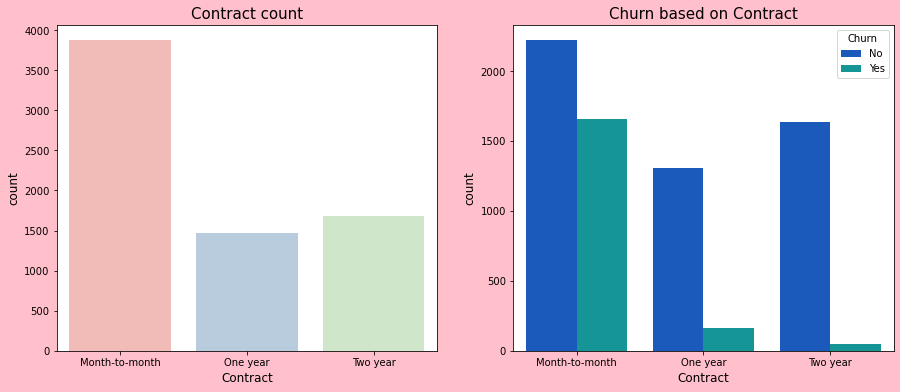

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


Month-to-month    55.11
Two year          23.96
One year          20.93
Name: Contract, dtype: float64

In [201]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['Contract'], palette='Pastel1')
plt.title('Contract count', fontsize=15)
plt.xlabel('Contract', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df1['Contract'], hue= df1['Churn'],palette='winter')
plt.title('Churn based on Contract', fontsize=15)
plt.xlabel('Contract', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

print(df1['Contract'].value_counts())

round(100*(df1['Contract'].value_counts()/len(df1['Contract'])),2)

### Observations

* According to our dataset 55.11 percent of customers are having month-to-month contract , 23.96 percent customers are having two year contract and 20.93 percent are having one year contract.
* Majority of ustomers are having mont to month contract.
* Among the three types of customers the customers who are havaing monthly contract is churned more compare to others contract type customers.

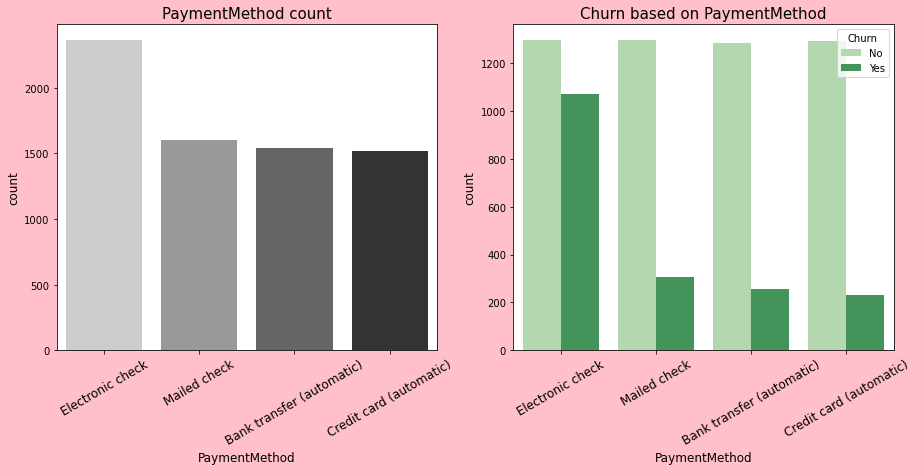

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


Electronic check             33.63
Mailed check                 22.81
Bank transfer (automatic)    21.93
Credit card (automatic)      21.63
Name: PaymentMethod, dtype: float64

In [205]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df1['PaymentMethod'], palette='gist_gray_r')
plt.title('PaymentMethod count', fontsize=15)
plt.xlabel('PaymentMethod', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(fontsize=12,rotation=30)


plt.subplot(1,2,2)
sns.countplot(df1['PaymentMethod'], hue= df1['Churn'],palette='Greens')
plt.title('Churn based on PaymentMethod', fontsize=15)
plt.xlabel('PaymentMethod', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(fontsize=12,rotation=30)

plt.show()

print(df1['PaymentMethod'].value_counts())

round(100*(df1['PaymentMethod'].value_counts()/len(df1['PaymentMethod'])),2)

### Observations

* The company is providing 4 types of payment methods Electronic check, Mailed check, Bank transfer (automatic) and Credit card (automatic)
* The majority of customers have done payments through Electronic check.
* 33.63 percent customers have done through Electronic check and 22.81 percent have done through Mailed check and 21.93 and 21.63 percent customers have done payments through Bank transfer (automatic) and  Credit card (automatic)  respectively
* the churn percenatge is very high in electronic check payment method among others.

# Describing Dataset

In [30]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation

In [31]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


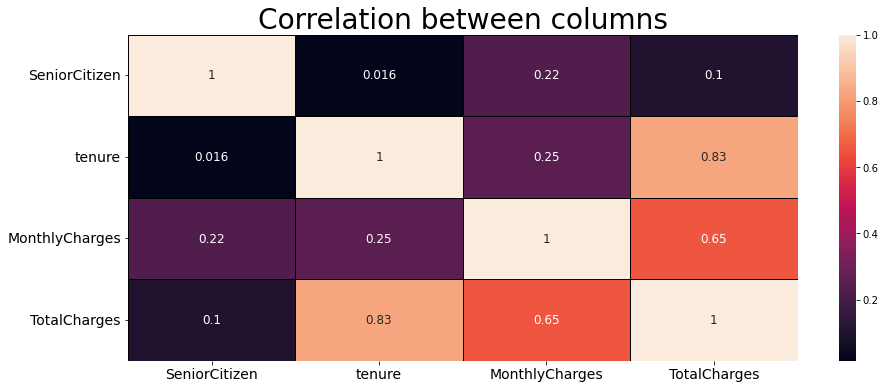

In [32]:
#df.corr() using heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(),linewidth='0.5',linecolor='black',annot=True, annot_kws={'size': 12})
plt.title('Correlation between columns', size=28)
plt.xticks(size=14)
plt.yticks(size=14,rotation=360)
plt.show()

### Observations

* there is 83 percent correlation between tenure and TotalCharges which is highest compared to others.
* monthlycharges and TotalChrages are 65 percent positively correlated with each other.
* There might be isuue of multicolinearity between the features.

# Checking outliers

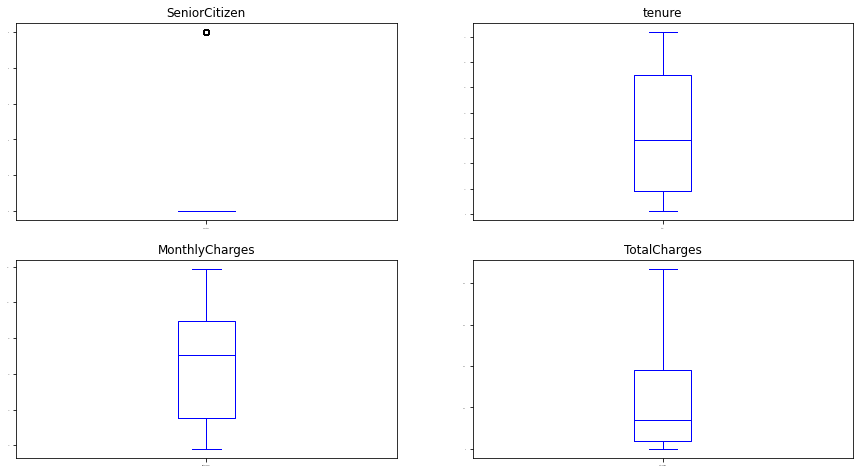

In [33]:
list_col=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
df1.plot(kind='box',title=list_col, subplots=True, layout=(2,2), legend= True, fontsize=1, figsize=(15,8), color='blue')
plt.show()

### Observations

* There are no outliers present

# Skewness

In [34]:
df1.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

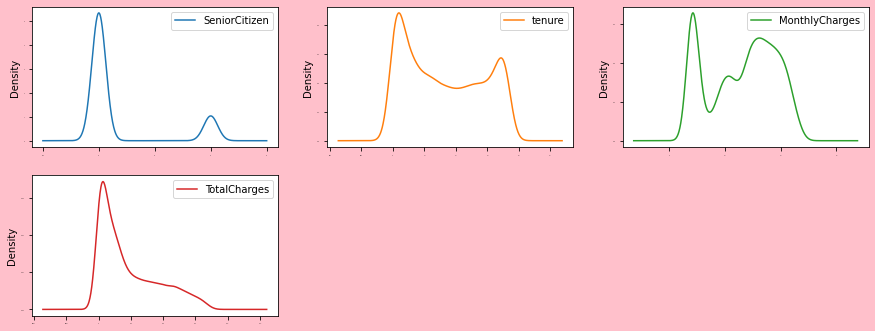

In [35]:
#vizualizing skewness
plt.rcParams['figure.facecolor']='pink'
df1.plot(kind='kde', subplots=True, layout=(5,3), sharex= False, legend= True, fontsize=1, figsize=(15,15))
plt.show()

### Observations

* There is skewness in tenure, monthly charges and total charges.
* we cant consider senior citizen column for because it is categorical type

# Findings(insights)

* gender , phone service avialibility and multi lines doest not impacting on churn
* high churn is seen in first 5 months of tenure.
* The customers are churned more where there is no onlineprotection, no  deviceprotection and no tech sup[port is given.
* The customers who are having month to month contract is more likely to churn.
* Electronic check payment customers are churning more so other payment meathods must be done user friendly.                                                                                                          

# Data Preprocessing

# Label Encoding

In [36]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df2=df1.copy()
df2.drop('customerID',axis=1,inplace=True)

In [38]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
# converting string into integer
from sklearn.preprocessing import LabelEncoder

#creating instance
le=LabelEncoder()

#training data
le.fit(df2['gender'])
#transforming data
df2['gender']=le.transform(df2['gender'])

le.fit(df2['Partner'])
df2['Partner']=le.transform(df2['Partner'])

le.fit(df2['Dependents'])
df2['Dependents']=le.transform(df2['Dependents'])

le.fit(df2['PhoneService'])
df2['PhoneService']=le.transform(df2['PhoneService'])

le.fit(df2['MultipleLines'])
df2['MultipleLines']=le.transform(df2['MultipleLines'])

le.fit(df2['InternetService'])
df2['InternetService']=le.transform(df2['InternetService'])

le.fit(df2['OnlineSecurity'])
df2['OnlineSecurity']=le.transform(df2['OnlineSecurity'])

le.fit(df2['OnlineBackup'])
df2['OnlineBackup']=le.transform(df2['OnlineBackup'])

le.fit(df2['DeviceProtection'])
df2['DeviceProtection']=le.transform(df2['DeviceProtection'])

le.fit(df2['TechSupport'])
df2['TechSupport']=le.transform(df2['TechSupport'])

le.fit(df2['StreamingTV'])
df2['StreamingTV']=le.transform(df2['StreamingTV'])

le.fit(df2['StreamingMovies'])
df2['StreamingMovies']=le.transform(df2['StreamingMovies'])

le.fit(df2['Contract'])
df2['Contract']=le.transform(df2['Contract'])

le.fit(df2['PaperlessBilling'])
df2['PaperlessBilling']=le.transform(df2['PaperlessBilling'])

le.fit(df2['PaymentMethod'])
df2['PaymentMethod']=le.transform(df2['PaymentMethod'])

le.fit(df2['Churn'])
df2['Churn']=le.transform(df2['Churn'])

In [40]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Removing outliers

using Zscore technique

In [41]:
from scipy.stats import zscore

In [42]:
z =np.abs(zscore(df2['tenure']))
print(len(np.where(z<3)))
dn=df2[(z<3)]
print('Shape of New Dataframe dn:',dn.shape)

1
Shape of New Dataframe dn: (7032, 20)


In [43]:
z =np.abs(zscore(dn['MonthlyCharges']))
print(z)
print(len(np.where(z<3)))
dn1=dn[(z<3)]
print('Shape of New Dataframe dn1:',dn1.shape)

0       1.161694
1       0.260878
2       0.363923
3       0.747850
4       0.196178
          ...   
7038    0.664868
7039    1.276493
7040    1.170004
7041    0.319168
7042    1.357932
Name: MonthlyCharges, Length: 7032, dtype: float64
1
Shape of New Dataframe dn1: (7032, 20)


In [44]:
z =np.abs(zscore(dn1['TotalCharges']))
print(z)
print(len(np.where(z<3)))
dn2=dn1[(z<3)]
print('Shape of New Dataframe dn2:',dn2.shape)

0       0.994194
1       0.173740
2       0.959649
3       0.195248
4       0.940457
          ...   
7038    0.129180
7039    2.241056
7040    0.854514
7041    0.872095
7042    2.012344
Name: TotalCharges, Length: 7032, dtype: float64
1
Shape of New Dataframe dn2: (7032, 20)


In [45]:
df_new=dn2
print('old dataframe',df2.shape)
print('new dataframe',df_new.shape)
print('no of rows dropped',df2.shape[0]-df_new.shape[0])

old dataframe (7032, 20)
new dataframe (7032, 20)
no of rows dropped 0


* since we had no outliers no data is lost

# Splitting data into x(features) and y(target)

In [46]:
#splitting data into x and y 
x=df_new.drop('Churn', axis=1) # dropping target column from dataframe and assigning the dataframe as x
y=df_new['Churn'] #assigning target column(W) to y variable

In [47]:
x.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6725,0,0,1,0,37,1,0,2,1,1,1,1,1,1,0,0,0,19.5,805.2


In [48]:
y.sample()

1418    0
Name: Churn, dtype: int32

# VIF(checking multicolinearity)

In [65]:
#library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
VIF =[]
for i in range(len(x.columns)):
    VIF.append(variance_inflation_factor(exog=x.values, exog_idx=i))

datavif={'Features':x.columns, 'VIF value': VIF}    
vif_df=pd.DataFrame(datavif)
vif_df

,Features,VIF value
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


* the vif for monthlycharges and totalcharges is very high than threshold so we will drop one of the column among them which is more correlated to target will be stored and the other one is dropped.

In [85]:
x=df2.drop(['TotalCharges', 'Churn'], axis=1)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


In [86]:
#checking vif after resolving
VIF =[]
for i in range(len(x.columns)):
    VIF.append(variance_inflation_factor(exog=x.values, exog_idx=i))

datavif={'Features':x.columns, 'VIF value': VIF}    
vif_df=pd.DataFrame(datavif)
vif_df

,Features,VIF value
0,gender,1.926503
1,SeniorCitizen,1.366908
2,Partner,2.818291
3,Dependents,1.946429
4,tenure,7.611995
5,PhoneService,14.170245
6,MultipleLines,2.756978
7,InternetService,4.315207
8,OnlineSecurity,2.247268
9,OnlineBackup,2.433762


# Removing skewness

In [87]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [88]:
x_df=pd.DataFrame(x)
x_df.skew()

0    -0.018776
1     1.831103
2     0.070024
3     0.880908
4    -0.242816
5    -2.729727
6     0.033718
7    -0.072388
8     0.150928
9    -0.000378
10    0.002098
11    0.141282
12   -0.096494
13   -0.105966
14    0.304841
15   -0.377503
16   -0.207192
17   -0.259485
dtype: float64

# scaling independent data

using StandardScaler

In [89]:
#mean=0, std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
scaler.fit(x)
x_scaled=scaler.transform(x)

# Model Building and Evaluation

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

## Finding Best Random State for Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
#creating instance 
LR=LogisticRegression()

In [93]:
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_LR=LR.predict(x_test)
    acc=accuracy_score(y_test,pred_LR)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7953091684434968 random_state 1
Accuracy 0.7981520966595593 random_state 2
Accuracy 0.8116560056858564 random_state 3
Accuracy 0.8187633262260128 random_state 6
Accuracy 0.820184790334044 random_state 9
Accuracy 0.8208955223880597 random_state 14
Accuracy 0.8244491826581379 random_state 24
Accuracy 0.8265813788201848 random_state 126
Accuracy 0.8315565031982942 random_state 244
Accuracy 0.8351101634683724 random_state 1095


## Model building with best random state

In [95]:
#creating train , test split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.20,random_state=1095)

#creating instance 
LR=LogisticRegression()

#traing data
LR.fit(x_train1,y_train1)

#predicting data
LR_pred=LR.predict(x_test1)

## Evaluation

In [96]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test1,LR_pred))
#print confusion matrics
print(confusion_matrix(y_test1,LR_pred))
#printing classification report
print(classification_report(y_test1,LR_pred))

Accuracy:  0.8351101634683724
[[956  91]
 [141 219]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1047
           1       0.71      0.61      0.65       360

    accuracy                           0.84      1407
   macro avg       0.79      0.76      0.77      1407
weighted avg       0.83      0.84      0.83      1407



In [97]:
print('Accuracy of train model: ',LR.score(x_train1,y_train1))

Accuracy of train model:  0.8001777777777778


In [100]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',956  /(956  +141 ) )
print('precision for 1(YES) =', 219/(219+91))

precision for 0(NO) =  0.8714676390154968
precision for 1(YES) = 0.7064516129032258


In [101]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',956  /(956  +91))
print('recall for 1(YES) =',219/(219+141 ))

recall for 0(NO) = 0.9130850047755492
recall for 1(YES) = 0.6083333333333333


## cross validation

In [102]:
from sklearn.model_selection import cross_val_score

In [114]:
scr=cross_val_score(LR,x_scaled,y,cv=5)
print('cross validation score of LogisticRegression: ',scr.mean())

cross validation score of LogisticRegression:  0.8041798728365894


# Decision Tree Classifier

## Finding Best Random State for Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    DTC=DecisionTreeClassifier() #creating instance 
    DTC.fit(x_train,y_train)  #traing data
    DTC_pred=DTC.predict(x_test) #predicting data.fit(x_train,y_train)
    acc=accuracy_score(y_test,DTC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7235252309879175 random_state 1
Accuracy 0.7491115849324804 random_state 6
Accuracy 0.7505330490405118 random_state 27
Accuracy 0.7547974413646056 random_state 308
Accuracy 0.7562189054726368 random_state 522
Accuracy 0.7633262260127932 random_state 1054


## Model building with best random state

In [120]:
#creating train , test split
x_train2,x_test2,y_train2,y_test2=train_test_split(x_scaled,y,test_size=0.20,random_state=1054)

DTC=DecisionTreeClassifier() #creating instance 
DTC.fit(x_train2,y_train2)  #traing data
DTC_pred=DTC.predict(x_test2) #predicting data

## Evaluation

In [121]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test2,DTC_pred))
#print confusion matrics
print(confusion_matrix(y_test2,DTC_pred))
#printing classification report
print(classification_report(y_test2,DTC_pred))

Accuracy:  0.7590618336886994
[[867 187]
 [152 201]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1054
           1       0.52      0.57      0.54       353

    accuracy                           0.76      1407
   macro avg       0.68      0.70      0.69      1407
weighted avg       0.77      0.76      0.76      1407



In [122]:
print('Accuracy of train model: ',DTC.score(x_train2,y_train2))

Accuracy of train model:  0.9976888888888888


In [123]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',867 /(867 +152 ) )
print('precision for 1(YES) =',201/(201+187))

precision for 0(NO) =  0.8508341511285574
precision for 1(YES) = 0.5180412371134021


In [124]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',867 /(867 +187))
print('recall for 1(YES) =',201/(201+152 ))

recall for 0(NO) = 0.8225806451612904
recall for 1(YES) = 0.5694050991501416


## cross validation

In [153]:
scr=cross_val_score(DTC,x_scaled,y,cv=15)
print('cross validation score of DecissionTreeClassifier: ',scr.mean())

cross validation score of DecissionTreeClassifier:  0.7246912567808088


# Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier

maxAcc=0
maxRS=0

for i in range(50,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    RFC=RandomForestClassifier(random_state=42) #creating instance 
    RFC.fit(x_train,y_train)  #traing data
    RFC_pred=RFC.predict(x_test) #predicting data
    acc=accuracy_score(y_test,RFC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7953091684434968 random_state 50
Accuracy 0.7974413646055437 random_state 61
Accuracy 0.798862828713575 random_state 79
Accuracy 0.7995735607675906 random_state 82
Accuracy 0.8031272210376688 random_state 126
Accuracy 0.8102345415778252 random_state 138
Accuracy 0.8123667377398721 random_state 333
Accuracy 0.8187633262260128 random_state 658


## Model building with best random state

In [156]:
#creating train , test split
x_train3,x_test3,y_train3,y_test3=train_test_split(x_scaled,y,test_size=0.20,random_state=658)

RFC=RandomForestClassifier(random_state=42) #creating instance 
RFC.fit(x_train3,y_train3)  #traing data
RFC_pred=RFC.predict(x_test3) #predicting data

## Evaluation

In [157]:
#checking score for training model
print('Score for training model :',RFC.score(x_train3,y_train3))

Score for training model : 0.9968


In [158]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test3,RFC_pred))
#print confusion matrics
print(confusion_matrix(y_test3,RFC_pred))
#printing classification report
print(classification_report(y_test3,RFC_pred))

Accuracy:  0.8187633262260128
[[947  96]
 [159 205]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1043
           1       0.68      0.56      0.62       364

    accuracy                           0.82      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407



In [160]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',947  /(947  +159 ) )
print('precision for 1(YES) =',205/(205+96))

precision for 0(NO) =  0.85623869801085
precision for 1(YES) = 0.6810631229235881


In [159]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',947  /(947  +96))
print('recall for 1(YES) =',205/(205+159 ))

recall for 0(NO) = 0.9079578139980825
recall for 1(YES) = 0.5631868131868132


## cross validation

In [167]:
scr=cross_val_score(RFC,x_scaled,y,cv=5)
print('cross validation score of RandomForestClassifier at cv folds 5 : ',round(scr.mean(),2)*100)

cross validation score of RandomForestClassifier at cv folds 5 :  79.0


# Suppport Vector Classifier(SVC)

## Finding Best Random State for Suppport Vector Classifier(SVC)

In [168]:
from sklearn.svm import SVC

maxAcc=0
maxRS=0

for i in range(50,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc=accuracy_score(y_test,svc_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.8166311300639659 random_state 50
Accuracy 0.8173418621179815 random_state 129
Accuracy 0.822316986496091 random_state 133
Accuracy 0.8244491826581379 random_state 362
Accuracy 0.8251599147121536 random_state 574
Accuracy 0.8315565031982942 random_state 1007


## Model building with best random state

In [169]:
#creating train , test split
x_train4,x_test4,y_train4,y_test4=train_test_split(x_scaled,y,test_size=0.20,random_state=1007)

#creating instance
svc=SVC()
#training data
svc.fit(x_train4,y_train4)
#predicting data
svc_pred=svc.predict(x_test4)

## Evaluation

In [170]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test4,svc_pred))
#print confusion matrics
print(confusion_matrix(y_test4,svc_pred))
#printing classification report
print(classification_report(y_test4,svc_pred))

Accuracy:  0.8315565031982942
[[1001   71]
 [ 166  169]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1072
           1       0.70      0.50      0.59       335

    accuracy                           0.83      1407
   macro avg       0.78      0.72      0.74      1407
weighted avg       0.82      0.83      0.82      1407



In [171]:
#checking score for training model
print('Score for training model :',svc.score(x_train4,y_train4))

Score for training model : 0.8211555555555555


In [172]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',1001   /(1001   +166  ))
print('precision for 1(YES) =',169/(169+71))

precision for 0(NO) =  0.8577549271636675
precision for 1(YES) = 0.7041666666666667


In [173]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',1001   /(1001   +71))
print('recall for 1(YES) =',169/(169+166  ))

recall for 0(NO) = 0.933768656716418
recall for 1(YES) = 0.5044776119402985


## cross validation

In [175]:
scr=cross_val_score(svc,x_scaled,y,cv=5)
print('cross validation score of SuperVectorClassifier: ',round(scr.mean(),2)*100)

cross validation score of SuperVectorClassifier:  80.0


# Hyper parameter tuning: ensemble techniques

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
parameters={'max_features':['auto', 'sqrt'], 'max_depth':['None',4,5,6,7,8], 'criterion':['gini', 'entropy'], 'random_state':[42]}

In [178]:
GCV=GridSearchCV(RandomForestClassifier(),parameters)

In [179]:
GCV.fit(x_train3, y_train3) #fitting the data into model

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': ['None', 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'random_state': [42]})

In [180]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'random_state': 42}

In [181]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, random_state=42)

In [182]:
RFC_best2=RandomForestClassifier(criterion='entropy',max_depth=7,max_features='auto',random_state=42) #creating instance 
RFC_best2.fit(x_train3,y_train3)  #traing data
RFC_best_pred2=RFC_best2.predict(x_test3) #predicting data

## Evaluation

In [184]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test3,RFC_best_pred2))
#print confusion matrics
print(confusion_matrix(y_test3,RFC_best_pred2))
#printing classification report
print(classification_report(y_test3,RFC_best_pred2))

Accuracy:  0.8216062544420754
[[946  97]
 [154 210]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1043
           1       0.68      0.58      0.63       364

    accuracy                           0.82      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.82      0.82      1407



In [185]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',946    /(946    +154  ) )
print('precision for 1(YES) =',210/(210+97))

precision for 0(NO) =  0.86
precision for 1(YES) = 0.6840390879478827


In [186]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',946    /(946    +97))
print('recall for 1(YES) =',210/(210+154  ))

recall for 0(NO) = 0.9069990412272292
recall for 1(YES) = 0.5769230769230769


## cross validation

In [188]:
scr=cross_val_score(RFC_best2,x_scaled,y,cv=15)
print('cross validation score of Tuned RandomForestClassifier at cv folds 5 : ',round(scr.mean(),2)*100)

cross validation score of Tuned RandomForestClassifier at cv folds 5 :  80.0


# ROC AUC curve

In [189]:
from sklearn.metrics import plot_roc_curve

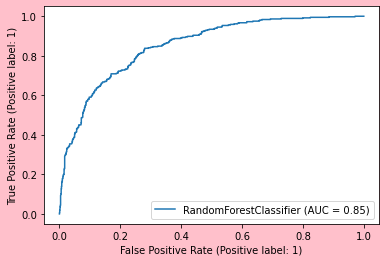

In [190]:
plot_roc_curve(RFC_best2,x_test3,y_test3)
plt.show()

* we have got the AUC score 0.85 which is good score

# Model Saving

In [191]:
import pickle

In [192]:
RFC_best_file2='customer_churn.pkl'
pickle.dump(RFC_best2,open(RFC_best_file2,'wb'))

# Conclusion

* I have choosed RandomForestClassifier as my final model on the basis of its accuracy score of training model and accuracy score of predicting model, cv score, f1score ,presicion , recall and ROC curve score.
* our final model is giving accuracy score of 0.82 which is highest and best score among other models.
* There is less difference between cross validation score(80.0) and accuracy score(82.16) for this model, it means the model is less underitting/overfitting compared to other models
* The ROC score is 0.85 which is also a good score.